In [3]:
import os

import geopandas as gpd
import pandas as pd
import numpy as np
# import momepy as mm
import networkx as nx
from mapclassify import greedy

from sqlalchemy import create_engine

import matplotlib.pyplot as plt

user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

url = f"postgresql://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(url)

In [4]:
def pgselect(table, buffer=10000, x=338250, y=392250):
    sql = f'''
    SELECT * FROM {table} 
    WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'''
    return gpd.read_postgis(sql, engine, geom_col='geometry')

In [5]:
roads = pgselect('openroads', buffer=500, x=340500, y=393200)

uprn = pgselect('openuprn', buffer=500, x=340500, y=393200)

bdgs = pgselect('openmaplocal', buffer=500,x=340500,y=393200)

<AxesSubplot:>

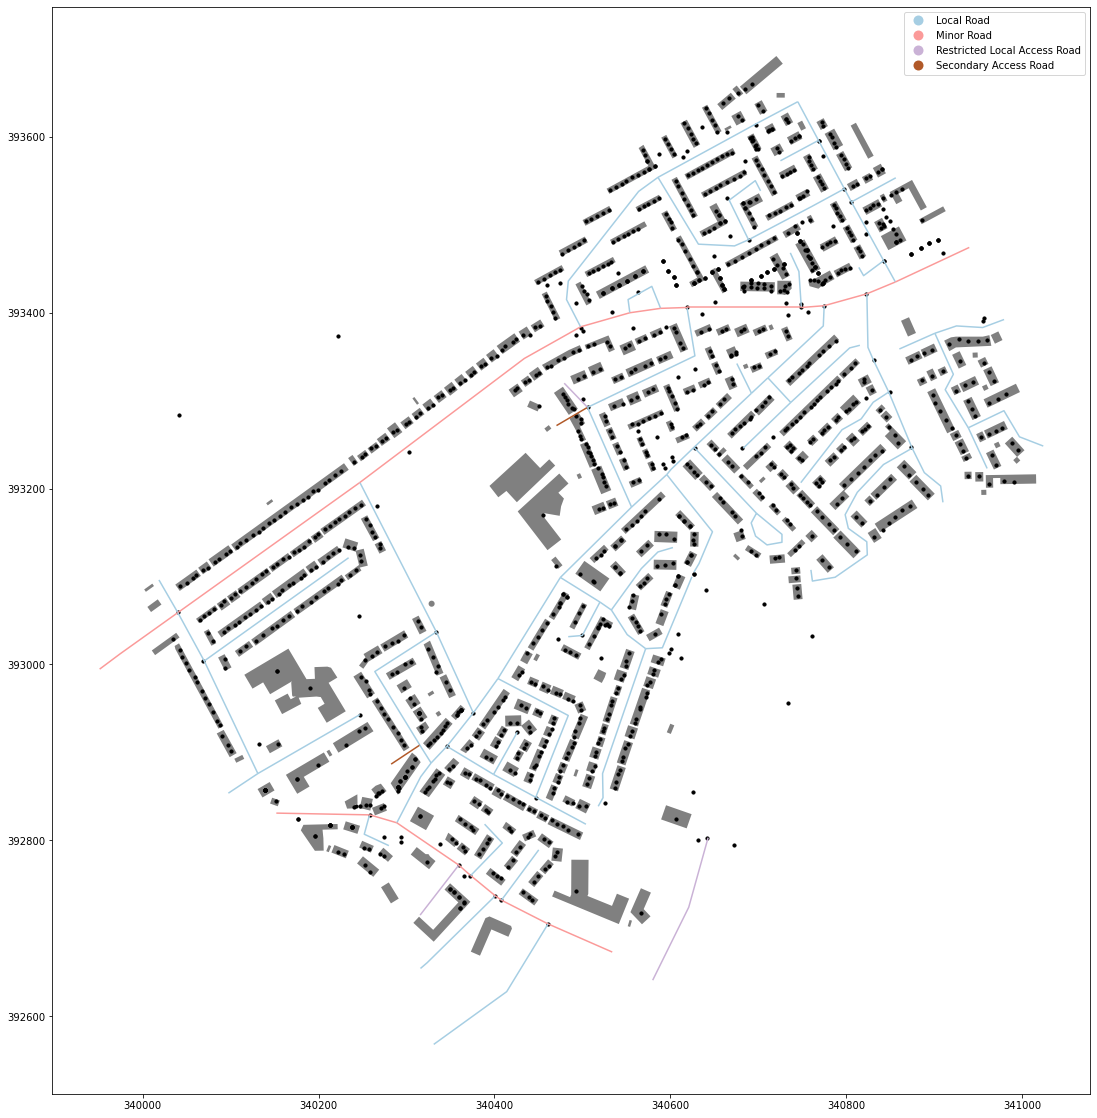

In [6]:
f, ax = plt.subplots(figsize=(20,20))
roads.plot('roadFunction', ax=ax, cmap='Paired', legend=True)
bdgs.plot(ax=ax, color='gray')
uprn.plot(ax=ax, markersize=10, color='k')

In [36]:
pd.Series(roads.name1.unique())\
    .apply(lambda x: str(x).split(' ')[1] 
           if len(str(x).split(' '))>1 else None).value_counts()

Close       12
Road        10
Lane         4
Drive        3
Grove        2
Park         2
Crescent     2
Row          1
Court        1
Parkside     1
Way          1
Side         1
dtype: int64

In [38]:
pd.Series(roads.name1.unique()).apply(lambda x: str(x).split(' ')[0]).value_counts()

Deysbrook      3
Lisleholme     3
Sandfield      1
Lees           1
Rockwell       1
Alcester       1
Winterburn     1
Avington       1
Somerley       1
Manderston     1
Mayfield       1
Halcombe       1
Minver         1
Thornbrook     1
Thornhead      1
Crown          1
Bevans         1
General        1
Allerford      1
South          1
Springdale     1
Glenmarsh      1
Crawford       1
Melwood        1
Harbern        1
Knebworth      1
Elmtree        1
Chapelcroft    1
Bramhope       1
Kentwell       1
Leyfield       1
Town           1
Access         1
Spring         1
Craven         1
Molland        1
None           1
dtype: int64